In [2]:
import pandas as pd
import numpy as np

In [3]:
dfrm=pd.read_csv('./csv_files_for_machinelearning/Bengaluru_House_Data.csv')
dfrm

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
dfrm.isna().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [10]:
dfrm1=dfrm.dropna()


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
dfrm.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [12]:
dfrm1.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458378,1.629936,96.857122
std,0.881128,0.780127,105.382490
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.755000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [13]:
df1=dfrm1.drop(['availability','society','balcony','area_type'],axis='columns')

df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00
...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345,2.0,57.00
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

KeyboardInterrupt: 

In [14]:
df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4
...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345,2.0,57.00,3
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2


In [15]:
df2=df1.drop(['size'],axis='columns')
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
3,Lingadheeranahalli,1521,3.0,95.00,3
5,Whitefield,1170,2.0,38.00,2
11,Whitefield,2785,5.0,295.00,4
...,...,...,...,...,...
13313,Uttarahalli,1345,2.0,57.00,3
13314,Green Glen Layout,1715,3.0,112.00,3
13315,Whitefield,3453,4.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2


In [16]:
df2.describe()

,bath,price,bhk
count,7496.000000,7496.000000,7496.000000
mean,2.458378,96.857122,2.529482
std,0.881128,105.382490,0.733228
min,1.000000,8.000000,1.000000
25%,2.000000,49.500000,2.000000
50%,2.000000,69.755000,2.000000
75%,3.000000,105.000000,3.000000
max,9.000000,2700.000000,11.000000


In [17]:
df2['total_sqft'].head(20)


0            1056
1            2600
3            1521
5            1170
11           2785
12           1000
14           2250
15           1175
16           1180
17           1540
18           2770
21           1755
22           2800
24            510
26            660
28           1151
29           1025
30    2100 - 2850
31           1075
32           1760
Name: total_sqft, dtype: object

In [18]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df2['price'].head(20)

0      39.07
1     120.00
3      95.00
5      38.00
11    295.00
12     38.00
14    148.00
15     73.50
16     48.00
17     60.00
18    290.00
21    122.00
22    380.00
24     25.25
26     23.10
28     48.77
29     47.00
30    186.00
31     35.00
32    123.00
Name: price, dtype: float64

In [20]:
df2[~df2['total_sqft'].apply(isFloat)].head(20)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
549,Hennur Road,1195 - 1440,2.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,59.935,2
850,Bannerghatta Road,1115 - 1130,2.0,58.935,2


In [21]:
def convert_ranges_to_float(x):
    tokens=x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_ranges_to_float)
df3.head(20)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
3,Lingadheeranahalli,1521.0,3.0,95.00,3
5,Whitefield,1170.0,2.0,38.00,2
11,Whitefield,2785.0,5.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,38.00,2
14,Sarjapur,2250.0,3.0,148.00,3
15,Mysore Road,1175.0,2.0,73.50,2
16,Bisuvanahalli,1180.0,3.0,48.00,3
17,Raja Rajeshwari Nagar,1540.0,3.0,60.00,3


In [23]:
df4=df3.copy()
df4['total_price_per_sqft']=df4['total_sqft']*df4['price']
df4

,location,total_sqft,bath,price,bhk,total_price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,41257.92
1,Chikka Tirupathi,2600.0,5.0,120.00,4,312000.00
3,Lingadheeranahalli,1521.0,3.0,95.00,3,144495.00
5,Whitefield,1170.0,2.0,38.00,2,44460.00
11,Whitefield,2785.0,5.0,295.00,4,821575.00
...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3,76665.00
13314,Green Glen Layout,1715.0,3.0,112.00,3,192080.00
13315,Whitefield,3453.0,4.0,231.00,5,797643.00
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,68460.00


In [24]:
len(df4['location'].unique())

634

In [25]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4.groupby('location')['location'].agg('count')
location_stats

location
1 Giri Nagar                       1
1st Block Jayanagar                1
1st Block Koramangala              2
1st Phase JP Nagar                14
2nd Block Hrbr Layout              1
                                  ..
Yelahanka New Town                22
Yelenahalli                        3
Yemlur                             3
Yeshwanthpur                      63
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 626, dtype: int64

In [26]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Giri Nagar                      1
1st Block Jayanagar               1
1st Block Koramangala             2
2nd Block Hrbr Layout             1
2nd Block Jayanagar               1
                                 ..
Wilson Garden                     3
Yelachenahalli                    8
Yelenahalli                       3
Yemlur                            3
Yeshwanthpur Industrial Suburb    1
Name: location, Length: 483, dtype: int64

In [27]:
df4.location=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
df4

,location,total_sqft,bath,price,bhk,total_price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,41257.92
1,Chikka Tirupathi,2600.0,5.0,120.00,4,312000.00
3,Lingadheeranahalli,1521.0,3.0,95.00,3,144495.00
5,Whitefield,1170.0,2.0,38.00,2,44460.00
11,Whitefield,2785.0,5.0,295.00,4,821575.00
...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,57.00,3,76665.00
13314,Green Glen Layout,1715.0,3.0,112.00,3,192080.00
13315,Whitefield,3453.0,4.0,231.00,5,797643.00
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,68460.00


In [28]:
len(df4['location'].unique())

144

In [29]:
df4[df4.total_sqft/df4.bhk<300].shape

(42, 6)

In [30]:
df4.shape

(7496, 6)

In [31]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(7454, 6)

In [32]:
df5.describe()

,total_sqft,bath,price,bhk,total_price_per_sqft
count,7439.000000,7454.000000,7454.000000,7454.000000,7.439000e+03
mean,1512.042279,2.459082,97.048317,2.527234,2.131663e+05
std,935.456470,0.875523,105.531400,0.728184,6.688074e+05
min,350.000000,1.000000,10.000000,1.000000,4.000000e+03
25%,1120.000000,2.000000,49.972500,2.000000,5.535000e+04
50%,1312.000000,2.000000,69.980000,2.000000,9.120000e+04
75%,1660.000000,3.000000,105.000000,3.000000,1.727992e+05
max,36000.000000,9.000000,2700.000000,11.000000,2.246670e+07


In [33]:
def remove_pps_outliers(dfrm):
    df_out=pd.DataFrame()
    for key,subdf in dfrm.groupby('location'):
        m=np.mean(subdf.total_price_per_sqft)
        st=np.std(subdf.total_price_per_sqft)
        reduced_df=subdf[(subdf.total_price_per_sqft>(m-st)) & (subdf.total_price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out



In [34]:

df6=remove_pps_outliers(df5)
df6.shape

(6470, 6)

In [35]:
import matplotlib.pyplot as plt
import matplotlib

In [36]:
def plot_scatter_chart(dfrm,location):
    bhk2=dfrm[(dfrm.location==location)&(dfrm.bhk==2)]
    bhk3=dfrm[(dfrm.location==location) & (dfrm.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.total_price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.total_price_per_sqft,color='green',label='3 BHK',s=50,marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price per square Feet")
    plt.title(location)
    plt.legend()


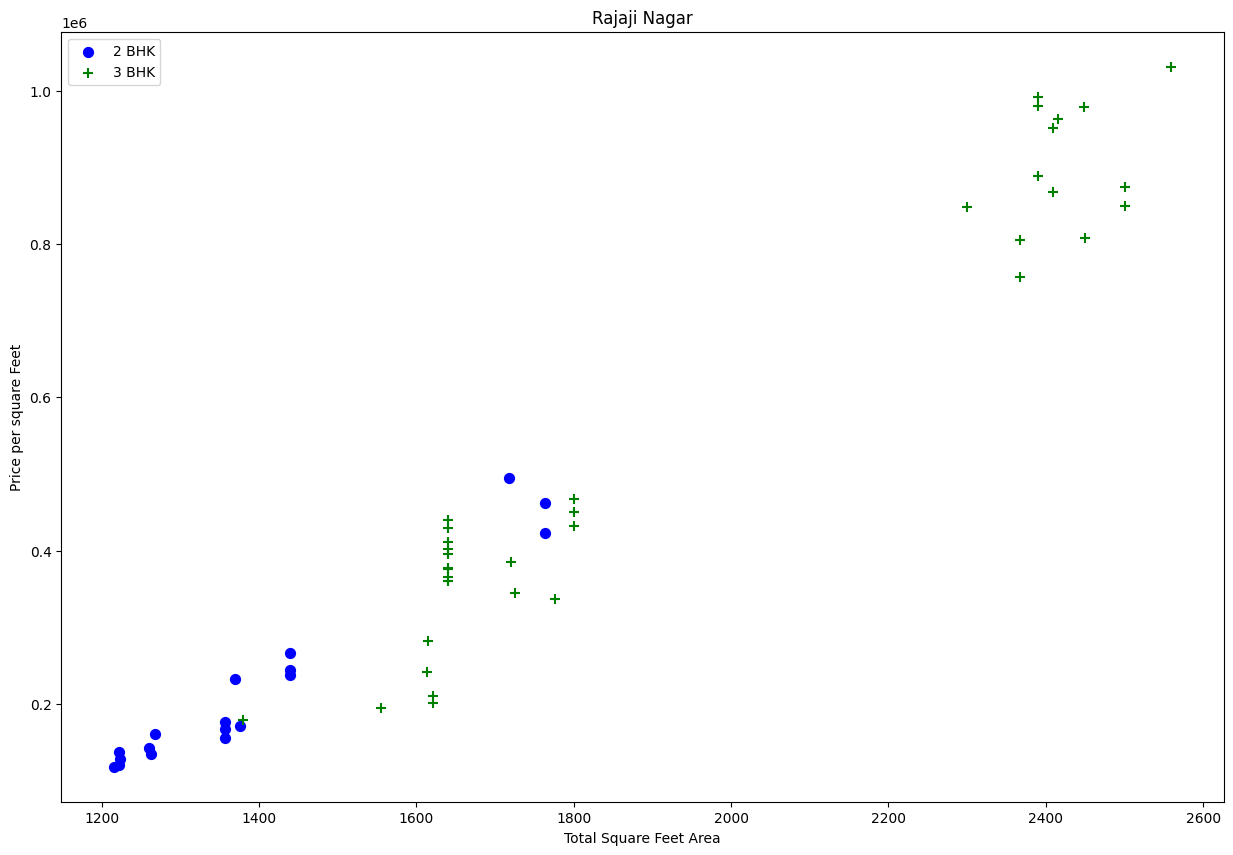

In [ ]:
plot_scatter_chart(df6,'Rajaji Nagar')

Text(0, 0.5, 'Count')

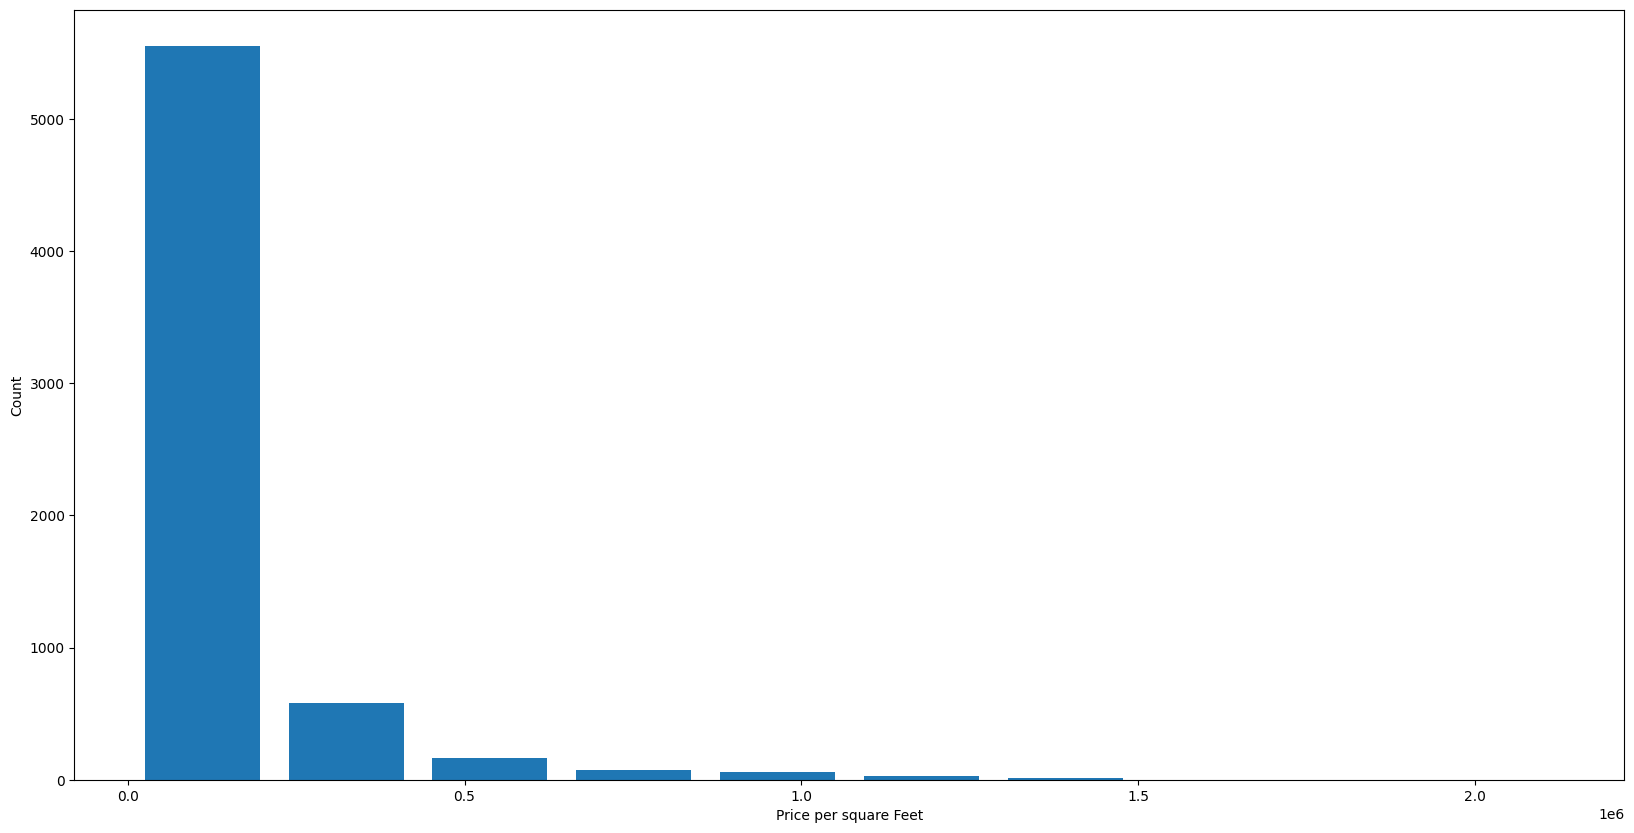

In [37]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df6.total_price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square Feet")
plt.ylabel("Count")

In [38]:
df6.bath.unique()

array([3., 4., 2., 1., 6., 5., 9.])

In [39]:
df7=df6[df6.bath<df6.bhk+2]
df7

,location,total_sqft,bath,price,bhk,total_price_per_sqft
0,1st Phase JP Nagar,1875.0,3.0,167.00,3,313125.0
1,1st Phase JP Nagar,2065.0,4.0,210.00,3,433650.0
2,1st Phase JP Nagar,2059.0,3.0,225.00,3,463275.0
3,1st Phase JP Nagar,1394.0,2.0,100.00,2,139400.0
4,1st Phase JP Nagar,1590.0,3.0,131.00,3,208290.0
...,...,...,...,...,...,...
6465,other,1000.0,2.0,49.50,2,49500.0
6466,other,1256.0,2.0,65.00,2,81640.0
6467,other,1353.0,2.0,110.00,2,148830.0
6468,other,1440.0,2.0,63.93,3,92059.2


In [40]:
df8=df7.drop(['total_price_per_sqft'],axis='columns')
df8

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,1875.0,3.0,167.00,3
1,1st Phase JP Nagar,2065.0,4.0,210.00,3
2,1st Phase JP Nagar,2059.0,3.0,225.00,3
3,1st Phase JP Nagar,1394.0,2.0,100.00,2
4,1st Phase JP Nagar,1590.0,3.0,131.00,3
...,...,...,...,...,...
6465,other,1000.0,2.0,49.50,2
6466,other,1256.0,2.0,65.00,2
6467,other,1353.0,2.0,110.00,2
6468,other,1440.0,2.0,63.93,3


In [41]:
dummies=pd.get_dummies(df8['location'])
df9= pd.concat([df8,dummies],axis='columns')
df9

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1st Phase JP Nagar,1875.0,3.0,167.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Phase JP Nagar,2065.0,4.0,210.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Phase JP Nagar,2059.0,3.0,225.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Phase JP Nagar,1394.0,2.0,100.00,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Phase JP Nagar,1590.0,3.0,131.00,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,other,1000.0,2.0,49.50,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6466,other,1256.0,2.0,65.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6467,other,1353.0,2.0,110.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6468,other,1440.0,2.0,63.93,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [42]:
df10=df9.drop(['other','location'],axis='columns')
df10

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1875.0,3.0,167.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2065.0,4.0,210.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2059.0,3.0,225.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1394.0,2.0,100.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1590.0,3.0,131.00,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,1000.0,2.0,49.50,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6466,1256.0,2.0,65.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6467,1353.0,2.0,110.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6468,1440.0,2.0,63.93,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
X=df10.drop(['price'],axis='columns')
y=df10.price

In [87]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.1)

In [88]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [89]:
model.score(test_X,test_y)

0.7851247485825066

In [86]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.65563411, 0.73182331, 0.73801326, 0.74605512, 0.65313427])

In [92]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))